In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WeatherNorm.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Windy        14 non-null     bool  
 4   Class        14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [ ]:
df.describe()

,Outlook,Temperature,Humidity,Windy,Class
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,False,P
freq,5,6,7,8,9


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

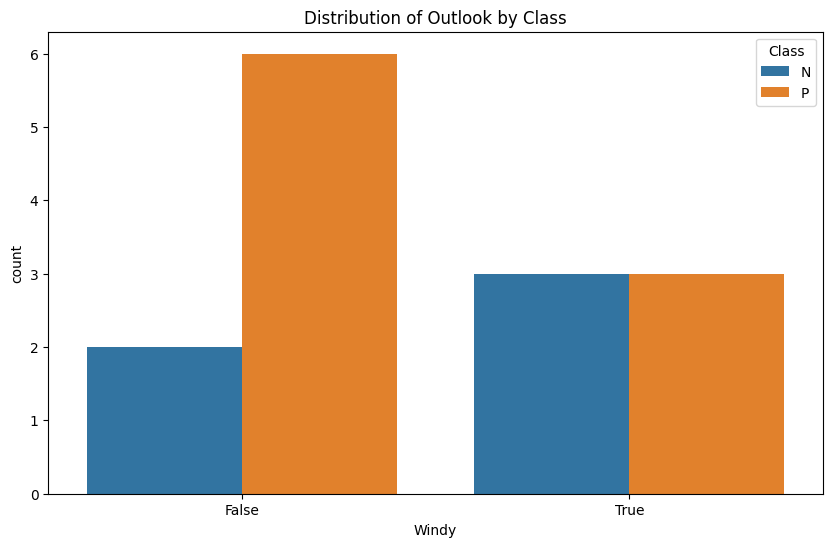

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df , x='Outlook' and 'Humidity' and 'Temperature' and 'Windy', hue='Class')
plt.title('Distribution of Outlook by Class')
plt.show()

In [ ]:
x = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
x = pd.get_dummies(x)
x

,Windy,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal
0,False,False,False,True,False,True,False,True,False
1,True,False,False,True,False,True,False,True,False
2,False,True,False,False,False,True,False,True,False
3,False,False,True,False,False,False,True,True,False
4,False,False,True,False,True,False,False,False,True
5,True,False,True,False,True,False,False,False,True
6,True,True,False,False,True,False,False,False,True
7,False,False,False,True,False,False,True,True,False
8,False,False,False,True,True,False,False,False,True
9,False,False,True,False,False,False,True,False,True


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(x_train, y_train)


GaussianNB()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
x_test

,Windy,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal
11,True,True,False,False,False,False,True,True,False
4,False,False,True,False,True,False,False,False,True
5,True,False,True,False,True,False,False,False,True


In [ ]:
y_pred

array(['P', 'P', 'P'], dtype='<U1')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
acc = accuracy_score(y_test, y_pred)

In [ ]:
acc

0.6666666666666666

In [ ]:
conf_metrix = confusion_matrix(y_test, y_pred)

In [ ]:
conf_metrix

array([[0, 1],
       [0, 2]])

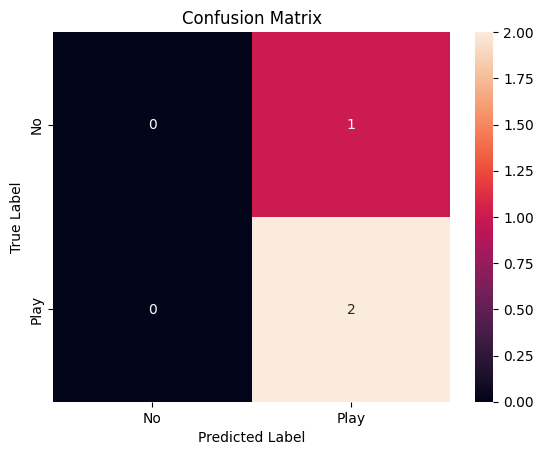

In [ ]:
plt.figure()
sns.heatmap(conf_metrix, annot=True, xticklabels=['No','Play'], yticklabels=['No','Play'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **R**

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("e1071")
library(e1071)

(as ‘lib’ is unspecified)














	‘/tmp/RtmpONGlpw/downloaded_packages’



In [ ]:
%%R
weather <- read.table("/content/drive/MyDrive/Colab Notebooks/WeatherNorm.csv", header = TRUE , sep = ",")

In [ ]:
%%R
weatherBayes <- naiveBayes(Class ~ Outlook + Temperature + Humidity
                            + Windy, data = weather)

In [ ]:
%%R
weatherBayes


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        N         P 
0.3571429 0.6428571 

Conditional probabilities:
   Outlook
Y    Overcast      Rain     Sunny
  N 0.0000000 0.4000000 0.6000000
  P 0.4444444 0.3333333 0.2222222

   Temperature
Y        Cool       Hot      Mild
  N 0.2000000 0.4000000 0.4000000
  P 0.3333333 0.2222222 0.4444444

   Humidity
Y        High    Normal
  N 0.8000000 0.2000000
  P 0.3333333 0.6666667

   Windy
Y       FALSE      TRUE
  N 0.4000000 0.6000000
  P 0.6666667 0.3333333



In [ ]:
%%R
newdata <- data.frame(Outlook = "Rain", Temperature = "Cool", Humidity = "High", Windy = TRUE)

In [ ]:
%%R
predict(weatherBayes, newdata, type = "class")

[1] N
Levels: N P


# ***Neural***

In [ ]:
iris_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')

In [ ]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

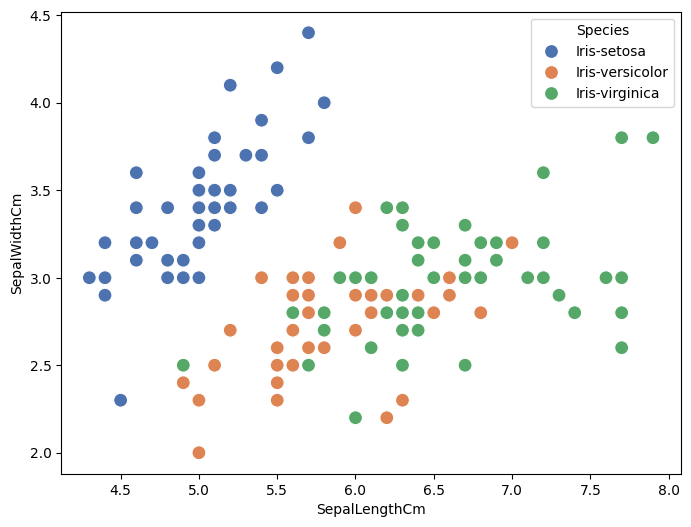

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris,
x='SepalLengthCm',
y='SepalWidthCm',
hue='Species',
palette='deep',
s=100)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

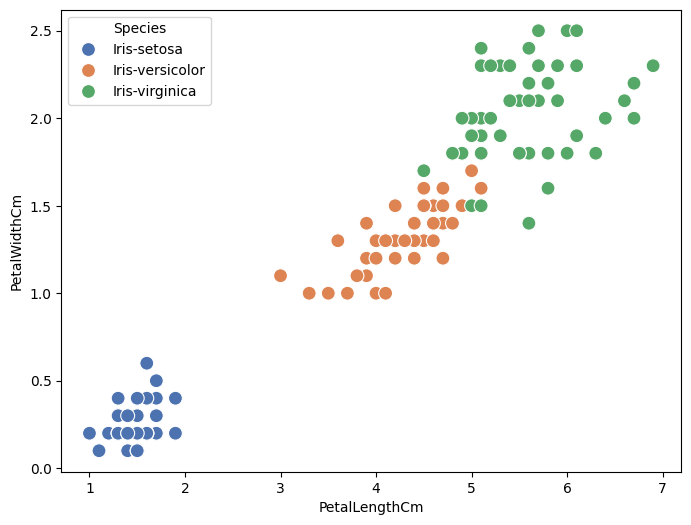

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris,
x='PetalLengthCm',
y='PetalWidthCm',
hue='Species',
palette='deep',
s=100)

In [ ]:
x= iris_df.drop('Species', axis=1)
y= iris_df['Species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(50,))

In [ ]:
mlp_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,))

In [ ]:
y_pred_mlp = mlp_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_mlp)
print(accuracy)

1.0


# ***R***

In [ ]:
%%R
install.packages("neuralnet")

(as ‘lib’ is unspecified)














	‘/tmp/RtmpONGlpw/downloaded_packages’



In [ ]:
%%R
library(neuralnet)

In [ ]:
%%R
iris <- read.table("/content/drive/MyDrive/Colab Notebooks/Iris.csv", header = TRUE , sep = ",")

In [ ]:
%%R
traindata <- as.data.frame(iris[1:149,])
testdata <- as.data.frame(iris[150,])

In [ ]:
%%R
irisNN <- neuralnet(Species ~ SepalLengthCm + SepalWidthCm + PetalLengthCm + PetalWidthCm, data = traindata, hidden = c(4,3),)

In [ ]:
%%R
plot(irisNN)